# Importing the libraries

In [67]:
import pandas as pd
import numpy as np

# Importing the dataset

In [68]:
df = pd.read_csv('../Data/results_v6.csv')
df.sample(5)

,p1_class,p1_hp,p1_ac,p1_avg_save,p2_class,p2_hp,p2_ac,p2_avg_save,p3_class,p3_hp,...,p4_ac,p4_avg_save,num_of_monsters,monster_name,monster_cr,monster_ac,monster_hp,monster_type,dificulty,players_level
75946,Cleric,47,18,3,Barbarian,66,16,3,Sorcerer,35,...,16,3,10,Skulk,0.50,14,18,monstrosity,0.826860,5
31753,Druid,32,11,3,Ranger,27,15,3,Sorcerer,20,...,16,3,1,Tyrannosaurus Rex,8.00,13,136,beast,0.125036,4
88929,Rogue,12,14,2,Sorcerer,15,14,2,Bard,12,...,17,2,1,Orog,2.00,18,42,humanoid,0.556481,2
65320,Wizzard,22,10,3,Cleric,25,15,3,Druid,21,...,17,3,3,Githyanki Warrior,3.00,17,49,humanoid,0.000000,3
7236,Sorcerer,17,11,3,Artificer,29,17,3,Paladin,42,...,11,3,10,Giant Bat,0.25,13,22,beast,0.841711,4


In [69]:
df_test = pd.read_csv('../Data/test_sample.csv', encoding='utf-8')
df_test.sample(5)

,p1_class,p1_hp,p1_ac,p1_avg_save,p2_class,p2_hp,p2_ac,p2_avg_save,p3_class,p3_hp,...,p4_ac,p4_avg_save,num_of_monsters,monster_name,monster_cr,monster_ac,monster_hp,monster_type,dificulty,players_level
94,Ranger,10,15,2,Sorcerer,5,15,2,Monk,9,...,12,2,1,Bugbear Chief,3.00,17,65,humanoid,0.069231,1
440,Warlock,12,13,2,Monk,9,11,2,Artificer,17,...,15,2,10,Male Steeder,0.25,12,13,monstrosity,0.000000,2
105,Fighter,20,18,2,Wizzard,17,14,2,Barbarian,27,...,18,2,1,Nothic,2.00,15,45,aberration,0.954819,2
28,Druid,6,11,2,Bard,4,12,2,Ranger,7,...,10,2,1,Derro Savant,3.00,13,36,aberration,0.000000,1
558,Cleric,38,20,3,Rogue,31,13,3,Druid,25,...,14,3,10,Giant Lizard,0.25,12,19,beast,0.752380,4


# Cleaning the data

## Dropping the columns that wont help in prediction

In [70]:
df.drop(columns=['monster_name'], inplace=True)
print(df.shape)
df.head()

(103086, 23)


,p1_class,p1_hp,p1_ac,p1_avg_save,p2_class,p2_hp,p2_ac,p2_avg_save,p3_class,p3_hp,...,p4_hp,p4_ac,p4_avg_save,num_of_monsters,monster_cr,monster_ac,monster_hp,monster_type,dificulty,players_level
0,Artificer,38,12,3,Bard,38,13,3,Barbarian,51,...,43,14,3,1,11.00,17,200,elemental,0.869491,5
1,Bard,24,12,3,Barbarian,36,17,3,Sorcerer,13,...,25,15,3,10,0.25,13,22,beast,0.067640,3
2,Ranger,17,12,2,Ranger,12,15,2,Druid,12,...,14,14,2,1,6.00,16,85,elemental,1.000000,2
3,Fighter,32,18,3,Paladin,32,19,3,Paladin,21,...,27,13,3,1,7.00,15,123,aberration,0.285597,3
4,Cleric,26,12,3,Paladin,34,15,3,Cleric,25,...,25,13,3,4,2.00,13,27,humanoid,0.445773,4


In [71]:
df_test.drop(columns=['monster_name'], inplace=True)
print(df_test.shape)
df_test.head()

(563, 23)


,p1_class,p1_hp,p1_ac,p1_avg_save,p2_class,p2_hp,p2_ac,p2_avg_save,p3_class,p3_hp,...,p4_hp,p4_ac,p4_avg_save,num_of_monsters,monster_cr,monster_ac,monster_hp,monster_type,dificulty,players_level
0,Fighter,10,18,2,Artificer,9,17,2,Cleric,6,...,8,18,2,1,1.00,13,28,beast,0.880663,1
1,Paladin,40,18,3,Rogue,25,16,3,Fighter,37,...,57,17,3,1,5.00,15,75,monstrosity,0.929774,5
2,Warlock,15,13,2,Ranger,17,16,2,Fighter,17,...,12,14,2,2,2.00,13,30,beast,0.534813,2
3,Monk,16,13,3,Monk,18,11,3,Paladin,26,...,30,12,3,1,5.00,13,95,beast,0.642994,3
4,Wizzard,4,11,2,Paladin,11,15,2,Sorcerer,6,...,6,16,2,10,0.25,15,11,construct,0.000000,1


In [72]:
df_test_result = df_test[['dificulty']]
df_test_result.head()

,dificulty
0,0.880663
1,0.929774
2,0.534813
3,0.642994
4,0.000000


In [73]:
df_test.drop(columns=['dificulty'], inplace=True)
df_test.head()

,p1_class,p1_hp,p1_ac,p1_avg_save,p2_class,p2_hp,p2_ac,p2_avg_save,p3_class,p3_hp,...,p4_class,p4_hp,p4_ac,p4_avg_save,num_of_monsters,monster_cr,monster_ac,monster_hp,monster_type,players_level
0,Fighter,10,18,2,Artificer,9,17,2,Cleric,6,...,Cleric,8,18,2,1,1.00,13,28,beast,1
1,Paladin,40,18,3,Rogue,25,16,3,Fighter,37,...,Ranger,57,17,3,1,5.00,15,75,monstrosity,5
2,Warlock,15,13,2,Ranger,17,16,2,Fighter,17,...,Cleric,12,14,2,2,2.00,13,30,beast,2
3,Monk,16,13,3,Monk,18,11,3,Paladin,26,...,Artificer,30,12,3,1,5.00,13,95,beast,3
4,Wizzard,4,11,2,Paladin,11,15,2,Sorcerer,6,...,Bard,6,16,2,10,0.25,15,11,construct,1


## Dropping miswrote data


In [74]:
df.p1_class.value_counts()

p1_class
Cleric       8046
Wizzard      8017
Rogue        7995
Warlock      7992
Paladin      7972
Monk         7948
Fighter      7931
Barbarian    7894
Artificer    7886
Ranger       7879
Sorcerer     7863
Druid        7832
Bard         7831
Name: count, dtype: int64

In [75]:
df = df[df['p1_class'] != '22']
df = df[df['dificulty'] >= 0]
df = df[df['monster_cr'] != -1]
df = df[df['players_level'] <= 5]
df.head()

,p1_class,p1_hp,p1_ac,p1_avg_save,p2_class,p2_hp,p2_ac,p2_avg_save,p3_class,p3_hp,...,p4_hp,p4_ac,p4_avg_save,num_of_monsters,monster_cr,monster_ac,monster_hp,monster_type,dificulty,players_level
0,Artificer,38,12,3,Bard,38,13,3,Barbarian,51,...,43,14,3,1,11.00,17,200,elemental,0.869491,5
1,Bard,24,12,3,Barbarian,36,17,3,Sorcerer,13,...,25,15,3,10,0.25,13,22,beast,0.067640,3
2,Ranger,17,12,2,Ranger,12,15,2,Druid,12,...,14,14,2,1,6.00,16,85,elemental,1.000000,2
3,Fighter,32,18,3,Paladin,32,19,3,Paladin,21,...,27,13,3,1,7.00,15,123,aberration,0.285597,3
4,Cleric,26,12,3,Paladin,34,15,3,Cleric,25,...,25,13,3,4,2.00,13,27,humanoid,0.445773,4


In [76]:
corr_matrix = df.corr(numeric_only=True)
abs(corr_matrix['dificulty']).sort_values(ascending = False)

dificulty          1.000000
num_of_monsters    0.244230
players_level      0.176662
p3_hp              0.176218
p2_hp              0.174881
p1_hp              0.174119
p4_hp              0.172930
p2_avg_save        0.143449
p3_avg_save        0.143449
p4_avg_save        0.143449
p1_avg_save        0.143449
monster_hp         0.098328
monster_cr         0.055285
monster_ac         0.048969
p1_ac              0.039577
p4_ac              0.037814
p3_ac              0.037377
p2_ac              0.033942
Name: dificulty, dtype: float64

# Sampling the data

In [77]:
X = df.drop(columns=['dificulty'])
X.sample(5)

,p1_class,p1_hp,p1_ac,p1_avg_save,p2_class,p2_hp,p2_ac,p2_avg_save,p3_class,p3_hp,...,p4_class,p4_hp,p4_ac,p4_avg_save,num_of_monsters,monster_cr,monster_ac,monster_hp,monster_type,players_level
87069,Monk,28,16,3,Ranger,51,15,3,Rogue,46,...,Barbarian,63,15,3,1,13.00,18,172,dragon,5
54255,Monk,30,10,3,Monk,29,15,3,Sorcerer,15,...,Rogue,28,13,3,2,2.00,12,22,undead,3
49093,Cleric,21,16,3,Barbarian,31,13,3,Paladin,36,...,Monk,22,14,3,10,0.25,12,11,plant,3
10933,Artificer,31,13,3,Barbarian,41,17,3,Fighter,39,...,Paladin,45,14,3,1,3.00,13,68,fiend,5
30324,Bard,16,13,3,Artificer,19,14,3,Warlock,20,...,Artificer,28,13,3,10,0.25,15,1,fey,3


In [78]:
Y = df['dificulty'].copy()
Y.sample(5)

101435    0.939466
58970     0.000000
73829     0.900605
73999     0.441597
35664     0.000000
Name: dificulty, dtype: float64

# One hot encoding the categorical data

In [79]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

encoder = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
features_df = encoder.fit_transform(df_test[['p1_class', 'p2_class', 'p3_class', 'p4_class', 'monster_type']])
df_test_encoded = pd.concat([df_test, features_df], axis=1).drop(columns=['p1_class', 'p2_class', 'p3_class', 'p4_class', 'monster_type'])
df_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 83 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   p1_hp                     563 non-null    int64  
 1   p1_ac                     563 non-null    int64  
 2   p1_avg_save               563 non-null    int64  
 3   p2_hp                     563 non-null    int64  
 4   p2_ac                     563 non-null    int64  
 5   p2_avg_save               563 non-null    int64  
 6   p3_hp                     563 non-null    int64  
 7   p3_ac                     563 non-null    int64  
 8   p3_avg_save               563 non-null    int64  
 9   p4_hp                     563 non-null    int64  
 10  p4_ac                     563 non-null    int64  
 11  p4_avg_save               563 non-null    int64  
 12  num_of_monsters           563 non-null    int64  
 13  monster_cr                563 non-null    float64
 14  monster_ac

In [80]:

X = pd.get_dummies(X, columns=[ 'p1_class', 'p2_class', 'p3_class', 'p4_class', 'monster_type'])
X.shape

(102817, 83)

In [81]:
print(len(Y))
print(len(X))

102817
102817


# Splitting the dataset into the Training set and Test set

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2)

# Fitting the XGBoost Regression to the dataset

In [83]:
import xgboost as xgb

clfXGB = xgb.XGBRegressor(early_stopping_rounds=10, eval_set=[(X_test, Y_test)])
clfXGB.fit( X_train,
            Y_train,
            verbose=100,
            eval_metric='rmse',
            eval_set=[(X_train, Y_train),(X_test, Y_test)]
            )

[0]	validation_0-rmse:0.35248	validation_1-rmse:0.35103


c:\Users\Pedro\OneDrive - Instituto Maua de Tecnologia\5e_encounter_predictor\.venv\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\Pedro\OneDrive - Instituto Maua de Tecnologia\5e_encounter_predictor\.venv\lib\site-packages\xgboost\core.py:160: UserWarning: [00:40:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "eval_set" } are not used.

  warnings.warn(smsg, UserWarning)


[99]	validation_0-rmse:0.16837	validation_1-rmse:0.18584


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None,
             eval_set=[(       p1_hp  p1_ac  p1_avg_save  p2_hp  p2_ac  p2_avg_save  p3_hp  p3_ac  \
56256     38     12            3     32     13            3     23     11   
83905     49     13            3     41     11            3     32     14   
61925     10     14            2     16     14            2     17     14   
26615     35     13            3     29     10            3     47     14   
96459     31...
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

# Predicting the using the model

In [84]:
clfXGB.score(X_test, Y_test)

0.7798992754876635

In [85]:
from random import randint

def predict(model,test, Y):
    input_test = randint(0, len(test))
    row_input = pd.DataFrame(test.iloc[input_test]).T
    try:
        print_input = pd.DataFrame(normalizer.inverse_transform(row_input), columns=row_input.columns)
    except:
        try:
            print_input = pd.DataFrame(scaler.inverse_transform(row_input), columns=row_input.columns)
        except:
            print_input = row_input 
    print('Input: ')
    display(row_input)
    print(f'The combat was between 4 players level {print_input.players_level.values[0]} against {print_input.num_of_monsters.values[0]} monster(s) CR {print_input.monster_cr.values[0]}')
    print('Expected: ', Y.iloc[input_test][0])
    print(type(row_input.values))
    print('Predicted: ', model.predict(row_input.values)[0])

In [86]:
predict(clfXGB, df_test_encoded, df_test_result)

Input: 


,p1_hp,p1_ac,p1_avg_save,p2_hp,p2_ac,p2_avg_save,p3_hp,p3_ac,p3_avg_save,p4_hp,...,monster_type_dragon,monster_type_elemental,monster_type_fey,monster_type_fiend,monster_type_giant,monster_type_humanoid,monster_type_monstrosity,monster_type_ooze,monster_type_plant,monster_type_undead
421,34.0,15.0,3.0,34.0,10.0,3.0,31.0,15.0,3.0,34.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


The combat was between 4 players level 17.0 against 39.00000000000001 monster(s) CR 104.0
Expected:  0.0
<class 'numpy.ndarray'>
Predicted:  -0.040579706


# Seeing the model feature importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

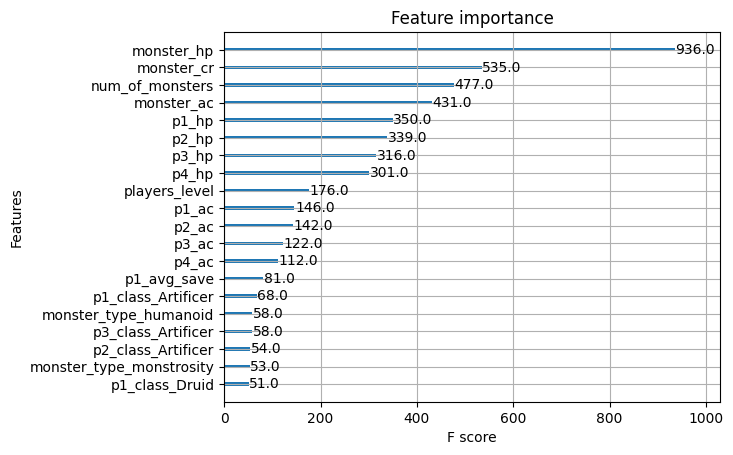

In [87]:
from xgboost import plot_importance

plot_importance(clfXGB, max_num_features=20, importance_type='weight')

# Hyperparameter tuning using GridSearchCV

In [88]:
from sklearn.model_selection import GridSearchCV

def parameter_search(params):
    search = GridSearchCV(xgb.XGBRegressor(
                            subsample=0.9,
                            colsample_bytree=0.5,
                            ),
                            param_grid=params,
                            scoring=['r2','neg_mean_squared_error'],
                            refit='r2',
                            n_jobs=-1,
                            cv=5,
                            verbose=4)
    search.fit(X_train, Y_train)
    print(search.best_score_)
    return search.best_params_

## Round 1

In [89]:
# search_sapce = {
#     'n_estimators': [100, 150, 200],
#     'max_depth': [1, 3, 5],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'gamma': [0, 0.25, 1.0],
#     'reg_lambda': [0, 1.0, 10.0],
#     'scale_pos_weight': [1, 3, 5],
#     'base_score': [0.2, 0.5, 0.8],
# }

# parameter_search(search_sapce)

## Round 2

In [90]:
# search_sapce = {
#     'n_estimators': [200, 300, 400],
#     'max_depth': [5,7,9],
#     'learning_rate': [0.1, 0.25, 0.5],
#     'gamma': [0.25],
#     'reg_lambda': [0.1,0.5,1],
#     'scale_pos_weight': [1],
#     'base_score': [0.8],
# }

# parameter_search(search_sapce)

## Round 3

In [91]:
# params = {
#     'n_estimators': [400, 650, 800],
#     'max_depth': [9,10,11],
#     'learning_rate': [0.1],
#     'gamma': [0.25],
#     'reg_lambda': [1],
#     'scale_pos_weight': [1],
#     'base_score': [0.8],
# }

# parameter_search(params)

## Round 4

In [92]:
# params = {
#     'n_estimators': [800,1000,1200],
#     'max_depth': [9],
#     'learning_rate': [0.1],
#     'gamma': [0.25],
#     'reg_lambda': [1],
#     'scale_pos_weight': [1],
#     'base_score': [0.8],
# }

# parameter_search(params)

In [93]:
FINAL_PARAMETERS_GCV = {
    'gamma': 0.25,
    'learning_rate': 0.1,
    'max_depth': 9,
    'n_estimators': 1200,
    'reg_lambda': 1,
    'scale_pos_weight': 1
 }

## Making the regression model

In [94]:
model_GCV = xgb.XGBRegressor(**FINAL_PARAMETERS_GCV, booster='gbtree',early_stopping_rounds=10,eval_metric='rmse')
model_GCV.fit( X_train,
            Y_train,
            eval_set=[(X_train, Y_train),(X_test, Y_test)],
            verbose=100
            
          )

[0]	validation_0-rmse:0.37664	validation_1-rmse:0.37466
[100]	validation_0-rmse:0.16651	validation_1-rmse:0.18688
[138]	validation_0-rmse:0.16466	validation_1-rmse:0.18535


XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=0.25, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## R² score of the model

In [95]:
model_GCV.score(X_test, Y_test)

0.7810583229668175

## Making predictions

In [96]:
predict(model_GCV, df_test_encoded, df_test_result)

Input: 


,p1_hp,p1_ac,p1_avg_save,p2_hp,p2_ac,p2_avg_save,p3_hp,p3_ac,p3_avg_save,p4_hp,...,monster_type_dragon,monster_type_elemental,monster_type_fey,monster_type_fiend,monster_type_giant,monster_type_humanoid,monster_type_monstrosity,monster_type_ooze,monster_type_plant,monster_type_undead
116,9.0,16.0,2.0,7.0,17.0,2.0,5.0,13.0,2.0,12.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


The combat was between 4 players level 5.0 against 191.0 monster(s) CR 3.25
Expected:  0.0
<class 'numpy.ndarray'>
Predicted:  -0.01871645


### Seeing the model feature importance


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

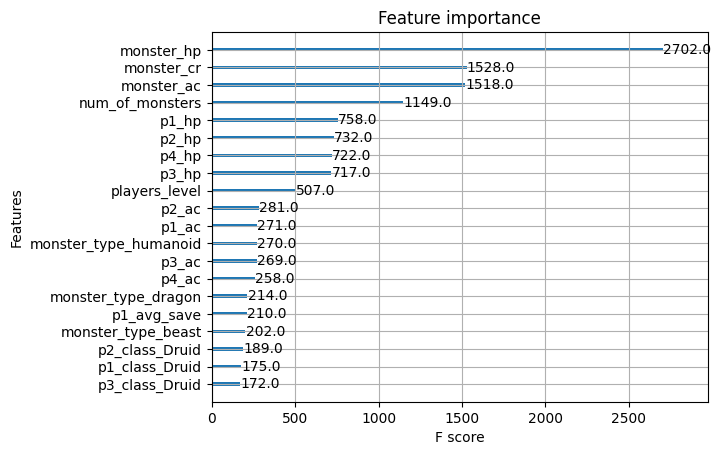

In [97]:
plot_importance(model_GCV, max_num_features=20, importance_type='weight')

# Hyperparameter tuning using Optuna

In [98]:
import optuna

In [99]:
from sklearn.metrics import mean_squared_error
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.15, step=0.005),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'gamma': trial.suggest_float('gamma', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'base_score': trial.suggest_float('base_score', 0.1, 0.9, step=0.1),
    }
    model = xgb.XGBRegressor(**param)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    return mean_squared_error(Y_test, Y_pred)

In [100]:
# study = optuna.create_study(direction='minimize', study_name='regression')
# study.optimize(objective, n_trials=100, n_jobs=-1)
# study.best_params


## Making the regression model

In [101]:
# FINAL_PARAMETERS_OPT = study.best_params
FINAL_PARAMETERS_OPT = {
    'max_depth': 10,
    'learning_rate': 0.045000000000000005,
    'n_estimators': 608,
    'gamma': 0.011766503509674925,
    'reg_lambda': 0.04863993937887906,
    'scale_pos_weight': 4.214943902447393,
    'base_score': 0.4
    }

model_OPT = xgb.XGBRegressor(**FINAL_PARAMETERS_OPT, booster='gbtree',early_stopping_rounds=10,eval_metric='rmse')
model_OPT.fit(  X_train,
            Y_train,
            eval_set=[(X_train, Y_train),(X_test, Y_test)],
            verbose=100
          )

[0]	validation_0-rmse:0.39222	validation_1-rmse:0.38938
[100]	validation_0-rmse:0.17335	validation_1-rmse:0.19893
[200]	validation_0-rmse:0.13799	validation_1-rmse:0.18190
[300]	validation_0-rmse:0.11885	validation_1-rmse:0.17480
[400]	validation_0-rmse:0.10637	validation_1-rmse:0.17082
[433]	validation_0-rmse:0.10508	validation_1-rmse:0.17035


XGBRegressor(base_score=0.4, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=0.011766503509674925, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.045000000000000005,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=608, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## R² score of the model

In [102]:
model_OPT.score(X_test, Y_test)

0.8150512368158127

## Making predictions

In [103]:
predict(model_OPT, df_test_encoded, df_test_result)

Input: 


,p1_hp,p1_ac,p1_avg_save,p2_hp,p2_ac,p2_avg_save,p3_hp,p3_ac,p3_avg_save,p4_hp,...,monster_type_dragon,monster_type_elemental,monster_type_fey,monster_type_fiend,monster_type_giant,monster_type_humanoid,monster_type_monstrosity,monster_type_ooze,monster_type_plant,monster_type_undead
507,11.0,16.0,2.0,3.0,14.0,2.0,10.0,17.0,2.0,9.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


The combat was between 4 players level 5.0 against 191.0 monster(s) CR 6.5
Expected:  0.0
<class 'numpy.ndarray'>
Predicted:  0.00071545347


## Seeing the model feature importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

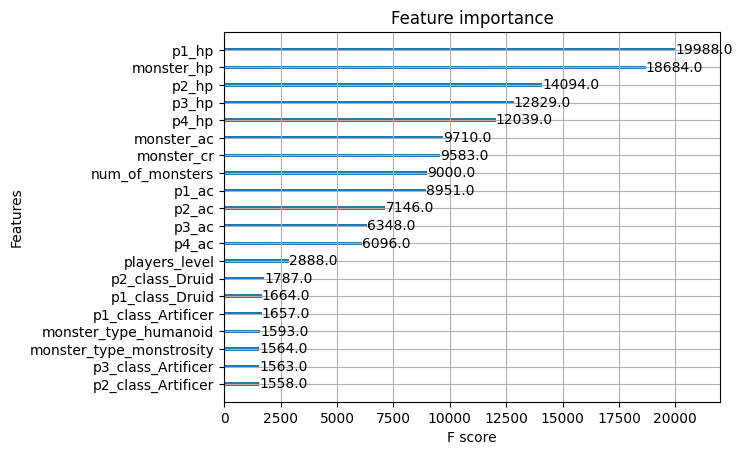

In [104]:
plot_importance(model_OPT, max_num_features=20, importance_type='weight')

# Scaling the data with StandardScaler beforehand  

In [105]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
df_test_encoded_scaled = scaler.transform(df_test_encoded)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_test_encoded_scaled = pd.DataFrame(df_test_encoded_scaled, columns=df_test_encoded.columns)
X_scaled

,p1_hp,p1_ac,p1_avg_save,p2_hp,p2_ac,p2_avg_save,p3_hp,p3_ac,p3_avg_save,p4_hp,...,monster_type_dragon,monster_type_elemental,monster_type_fey,monster_type_fiend,monster_type_giant,monster_type_humanoid,monster_type_monstrosity,monster_type_ooze,monster_type_plant,monster_type_undead
0,1.142335,-0.994412,0.815723,1.142555,-0.549494,0.815723,2.171532,1.227785,0.815723,1.535610,...,-0.234171,4.452618,-0.204958,-0.280589,-0.165435,-0.491423,-0.393602,-0.11745,-0.190484,-0.248767
1,0.034070,-0.994412,0.815723,0.984249,1.225464,0.815723,-0.836419,-0.554420,0.815723,0.113247,...,-0.234171,-0.224587,-0.204958,-0.280589,-0.165435,-0.491423,-0.393602,-0.11745,-0.190484,-0.248767
2,-0.520063,-0.994412,-1.225907,-0.915425,0.337985,-1.225907,-0.915576,0.782233,-1.225907,-0.755975,...,-0.234171,4.452618,-0.204958,-0.280589,-0.165435,-0.491423,-0.393602,-0.11745,-0.190484,-0.248767
3,0.667365,1.669771,0.815723,0.667637,2.112943,0.815723,-0.203166,2.118887,0.815723,0.271287,...,-0.234171,-0.224587,-0.204958,-0.280589,-0.165435,-0.491423,-0.393602,-0.11745,-0.190484,-0.248767
4,0.192394,-0.994412,0.815723,0.825943,0.337985,0.815723,0.113460,-0.554420,0.815723,0.113247,...,-0.234171,-0.224587,-0.204958,-0.280589,-0.165435,2.034908,-0.393602,-0.11745,-0.190484,-0.248767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102812,0.746526,2.557833,0.815723,0.588483,-0.549494,0.815723,0.825870,-0.108869,0.815723,1.377570,...,-0.234171,-0.224587,-0.204958,-0.280589,-0.165435,-0.491423,-0.393602,-0.11745,-0.190484,-0.248767
102813,1.775630,0.337680,0.815723,0.905096,-0.105755,0.815723,0.271773,-0.554420,0.815723,0.508348,...,-0.234171,-0.224587,-0.204958,-0.280589,-0.165435,-0.491423,-0.393602,-0.11745,-0.190484,-0.248767
102814,-0.836710,-1.438443,-1.225907,-0.677966,-1.436974,-1.225907,-0.361480,1.673336,-1.225907,-1.151076,...,-0.234171,-0.224587,-0.204958,-0.280589,-0.165435,2.034908,-0.393602,-0.11745,-0.190484,-0.248767
102815,-0.995033,-0.994412,-1.225907,-0.994578,-0.549494,-1.225907,-0.678106,1.227785,-1.225907,-0.597935,...,-0.234171,-0.224587,-0.204958,-0.280589,-0.165435,-0.491423,-0.393602,-0.11745,-0.190484,-0.248767


In [106]:
X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled = train_test_split(X_scaled, Y, test_size=.2)

# Optune with scaled data

In [107]:
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.15, step=0.005),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'gamma': trial.suggest_float('gamma', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'base_score': trial.suggest_float('base_score', 0.1, 0.9, step=0.1),
    }
    model = xgb.XGBRegressor(**param)
    model.fit(X_train_scaled, Y_train_scaled)
    Y_pred = model.predict(X_test_scaled)
    return mean_squared_error(Y_test_scaled, Y_pred)

In [108]:
from sklearn.metrics import mean_squared_error

# study = optuna.create_study(direction='minimize', study_name='regression')
# study.optimize(objective, n_trials=100, n_jobs=-1)
# study.best_params

In [109]:
# FINAL_PARAMETERS_OPT_SCALED = study.best_params
FINAL_PARAMETERS_OPT_SCALED={
  'max_depth': 9,
 'learning_rate': 0.05,
 'n_estimators': 727,
 'gamma': 0.013146398223208441,
 'reg_lambda': 0.4945567568422574,
 'scale_pos_weight': 1.5002512914516584,
 'base_score': 0.7000000000000001
}

model_OPT_SCALED = xgb.XGBRegressor(**FINAL_PARAMETERS_OPT_SCALED, booster='gbtree',early_stopping_rounds=10,eval_metric='rmse')
model_OPT_SCALED.fit(
            X_train_scaled,
            Y_train_scaled,
            eval_set=[(X_train_scaled, Y_train_scaled),(X_test_scaled, Y_test_scaled)],
            verbose=100
          )

[0]	validation_0-rmse:0.44891	validation_1-rmse:0.44900
[100]	validation_0-rmse:0.18448	validation_1-rmse:0.20713
[200]	validation_0-rmse:0.15383	validation_1-rmse:0.18918
[300]	validation_0-rmse:0.13497	validation_1-rmse:0.17981
[400]	validation_0-rmse:0.12006	validation_1-rmse:0.17259
[500]	validation_0-rmse:0.11232	validation_1-rmse:0.16921
[504]	validation_0-rmse:0.11232	validation_1-rmse:0.16921


XGBRegressor(base_score=0.7000000000000001, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=0.013146398223208441, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=727, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [110]:
model_OPT_SCALED.score(X_test_scaled, Y_test_scaled)

0.8187138793555173

In [111]:
predict(model_OPT_SCALED, df_test_encoded_scaled, df_test_result)

Input: 


,p1_hp,p1_ac,p1_avg_save,p2_hp,p2_ac,p2_avg_save,p3_hp,p3_ac,p3_avg_save,p4_hp,...,monster_type_dragon,monster_type_elemental,monster_type_fey,monster_type_fiend,monster_type_giant,monster_type_humanoid,monster_type_monstrosity,monster_type_ooze,monster_type_plant,monster_type_undead
358,-1.549166,-0.550382,-1.225907,-1.390343,-0.993234,-1.225907,-1.311359,-0.108869,-1.225907,-1.072056,...,-0.234171,-0.224587,-0.204958,-0.280589,-0.165435,-0.491423,-0.393602,-0.11745,-0.190484,-0.248767


The combat was between 4 players level -4.6602114063788145 against 23.605794247544804 monster(s) CR -11.445245650224658
Expected:  0.0
<class 'numpy.ndarray'>
Predicted:  0.020860426


<Axes: title={'center': 'Scaled'}, xlabel='F score', ylabel='Features'>

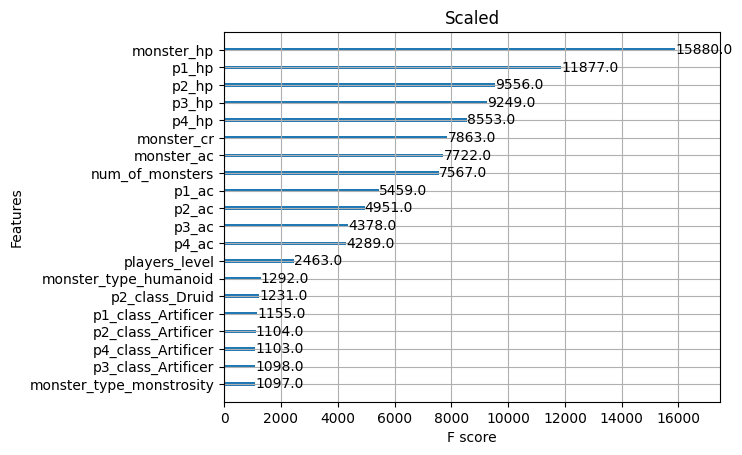

In [112]:
plot_importance(model_OPT_SCALED, max_num_features=20, importance_type='weight', title='Scaled')

# Normalizing the data with MinMaxScaller beforehand  

In [113]:
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()
normalizer.fit(X)
X_normalized = normalizer.transform(X)
df_test_encoded_nomalized = normalizer.transform(df_test_encoded)
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)
df_test_encoded_nomalized = pd.DataFrame(df_test_encoded_nomalized, columns=df_test_encoded.columns)
X_normalized

,p1_hp,p1_ac,p1_avg_save,p2_hp,p2_ac,p2_avg_save,p3_hp,p3_ac,p3_avg_save,p4_hp,...,monster_type_dragon,monster_type_elemental,monster_type_fey,monster_type_fiend,monster_type_giant,monster_type_humanoid,monster_type_monstrosity,monster_type_ooze,monster_type_plant,monster_type_undead
0,0.500000,0.2,1.0,0.507246,0.3,1.0,0.676056,0.7,1.0,0.579710,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.300000,0.2,1.0,0.478261,0.7,1.0,0.140845,0.3,1.0,0.318841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.200000,0.2,0.0,0.130435,0.5,0.0,0.126761,0.6,0.0,0.159420,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.414286,0.8,1.0,0.420290,0.9,1.0,0.253521,0.9,1.0,0.347826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.328571,0.2,1.0,0.449275,0.5,1.0,0.309859,0.3,1.0,0.318841,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102812,0.428571,1.0,1.0,0.405797,0.3,1.0,0.436620,0.4,1.0,0.550725,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102813,0.614286,0.5,1.0,0.463768,0.4,1.0,0.338028,0.3,1.0,0.391304,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102814,0.142857,0.1,0.0,0.173913,0.1,0.0,0.225352,0.8,0.0,0.086957,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
102815,0.114286,0.2,0.0,0.115942,0.3,0.0,0.169014,0.7,0.0,0.188406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
X_train_normalized, X_test_normalized, Y_train_normalized, Y_test_normalized = train_test_split(X_normalized, Y, test_size=.2)

In [115]:
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.15, step=0.005),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'gamma': trial.suggest_float('gamma', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'base_score': trial.suggest_float('base_score', 0.1, 0.9, step=0.1),
    }
    model = xgb.XGBRegressor(**param)
    model.fit(X_train_normalized, Y_train_normalized)
    Y_pred = model.predict(X_test_normalized)
    return mean_squared_error(Y_test_normalized, Y_pred)

In [116]:

# study = optuna.create_study(direction='minimize', study_name='regression')
# study.optimize(objective, n_trials=100, n_jobs=-1)
# study.best_params

In [117]:
# FINAL_PARAMETERS_OPT_NORMALIZED = study.best_params
FINAL_PARAMETERS_OPT_NORMALIZED={
    'max_depth': 8,
 'learning_rate': 0.11,
 'n_estimators': 334,
 'gamma': 0.011036755287746619,
 'reg_lambda': 0.5388869614898792,
 'scale_pos_weight': 1.431829957440863,
 'base_score': 0.30000000000000004
}

model_OPT_NORMALIZED = xgb.XGBRegressor(**FINAL_PARAMETERS_OPT_NORMALIZED, booster='gbtree',early_stopping_rounds=10,eval_metric='rmse')
model_OPT_NORMALIZED.fit(
            X_train_normalized,
            Y_train_normalized,
            eval_set=[(X_train_normalized, Y_train_normalized),(X_test_normalized, Y_test_normalized)],
            verbose=100
          )

[0]	validation_0-rmse:0.40207	validation_1-rmse:0.40166
[100]	validation_0-rmse:0.16862	validation_1-rmse:0.19322
[200]	validation_0-rmse:0.13601	validation_1-rmse:0.17547
[300]	validation_0-rmse:0.11857	validation_1-rmse:0.16785
[310]	validation_0-rmse:0.11857	validation_1-rmse:0.16785


XGBRegressor(base_score=0.30000000000000004, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=0.011036755287746619, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.11, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=334, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [118]:
model_OPT_NORMALIZED.score(X_test_normalized, Y_test_normalized)

0.8224028710438329

In [119]:
predict(model_OPT_NORMALIZED, df_test_encoded_nomalized, df_test_result)

Input: 


,p1_hp,p1_ac,p1_avg_save,p2_hp,p2_ac,p2_avg_save,p3_hp,p3_ac,p3_avg_save,p4_hp,...,monster_type_dragon,monster_type_elemental,monster_type_fey,monster_type_fiend,monster_type_giant,monster_type_humanoid,monster_type_monstrosity,monster_type_ooze,monster_type_plant,monster_type_undead
323,0.114286,0.4,0.0,0.101449,0.6,0.0,0.056338,0.3,0.0,0.086957,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


The combat was between 4 players level 1.0 against 1.0 monster(s) CR 2.0
Expected:  0.3211157963023029
<class 'numpy.ndarray'>
Predicted:  0.47709477


<Axes: title={'center': 'Normalized'}, xlabel='F score', ylabel='Features'>

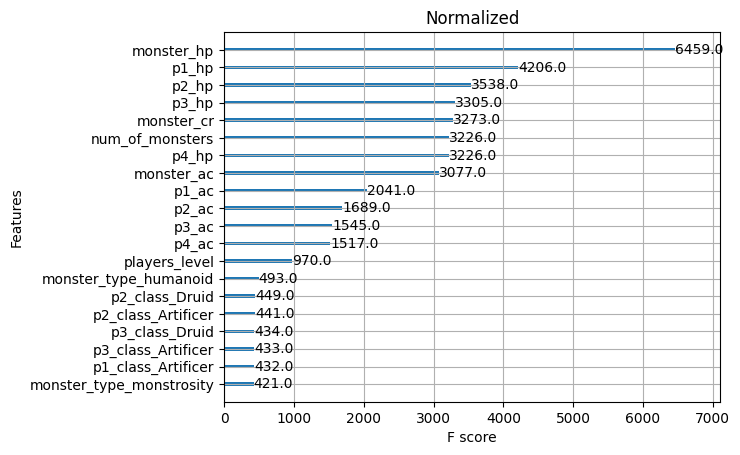

In [120]:
plot_importance(model_OPT_NORMALIZED, max_num_features=20, importance_type='weight', title='Normalized')

In [121]:
import pickle

# Assuming 'encoder' and 'scaler' are your OneHotEncoder and StandardScaler instances
with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

with open('normalizer.pkl', 'wb') as f:
    pickle.dump(normalizer, f)

model_OPT_NORMALIZED.save_model('model_OPT_NORMALIZED.ubj')